<a href="https://colab.research.google.com/github/Papagoat/algo-trading-strategies/blob/main/Rayner_Teo_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
import time
import requests
import io

In [ ]:
start = datetime.datetime(2010,5,18)
# end = datetime.datetime(2021,5,17)
end = datetime.datetime.now()
# start = end - datetime.timedelta(days=200)

In [ ]:
df = yf.download(tickers="TSLA",start=start, end=end)
# df = yf.Ticker('BTC-USD').history(period='200d', interval='1h')
# df

[*********************100%***********************]  1 of 1 completed


In [ ]:
df['MA200'] = df['Adj Close'].rolling(window=200).mean()
# df = df.dropna()
# df

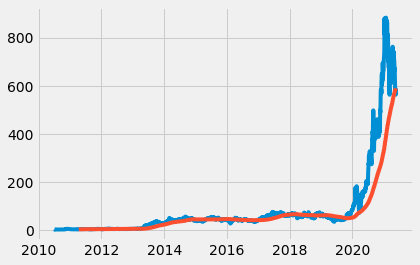

In [ ]:
plt.plot(df['Adj Close'])
plt.plot(df['MA200'])
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
df['price change'] = df['Adj Close'].pct_change()
# df = df.dropna()
# df

In [ ]:
df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)

In [ ]:
df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

In [ ]:
df['Avg Up'] = df['Upmove'].ewm(span=19).mean()

In [ ]:
df['Avg Down'] = df['Downmove'].ewm(span=19).mean()

In [ ]:
# df = df.dropna()
# df

In [ ]:
df['RS'] = df['Avg Up']/df['Avg Down']

In [ ]:
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

In [ ]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'

In [ ]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'

In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-04-12,5.016000,5.042000,4.860000,4.930000,4.930000,6787000,4.745270,-0.024535,0.000000,0.024535,0.014737,0.015317,0.962133,49.035062,No
2011-04-13,5.026000,5.138000,4.962000,4.986000,4.986000,6057500,4.746310,0.011359,0.011359,0.000000,0.014399,0.013785,1.044535,51.089129,No
2011-04-14,4.974000,5.056000,4.840000,5.028000,5.028000,4917000,4.747620,0.008424,0.008424,0.000000,0.013801,0.012406,1.112432,52.661192,No
2011-04-15,5.130000,5.236000,5.082000,5.116000,5.116000,4717500,4.751240,0.017502,0.017502,0.000000,0.014171,0.011166,1.269178,55.931187,No
2011-04-18,5.026000,5.124000,4.872000,5.006000,5.006000,5169500,4.757070,-0.021501,0.000000,0.021501,0.012754,0.012199,1.045487,51.111897,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,583.409973,592.869995,570.460022,589.739990,589.739990,33230600,584.012019,0.031573,0.031573,0.000000,0.009072,0.019513,0.464948,31.738192,No
2021-05-17,575.549988,589.729980,561.200012,576.830017,576.830017,32390400,585.408679,-0.021891,0.000000,0.021891,0.008165,0.019751,0.413415,29.249354,No
2021-05-18,568.000000,596.250000,563.380005,577.869995,577.869995,36830600,586.867269,0.001803,0.001803,0.000000,0.007529,0.017776,0.423557,29.753445,No


In [ ]:
def buy_sell(df):
  sig_price_buy = []
  sig_price_sell = []
  flag = False

  for i in range(len(df)):
    if df['Buy'][i] == 'Yes':
      if not flag:
        sig_price_buy.append(df['Adj Close'][i])
        sig_price_sell.append(np.nan)
        flag = True
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    # elif df['Buy'][i] == 'No':
    else:
      if flag:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(df['Adj Close'][i])
        flag = False
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    # else:
    #     sig_price_buy.append(np.nan)
    #     sig_price_sell.append(np.nan)

  return(sig_price_buy, sig_price_sell)

In [ ]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]
if df["Buy"].iloc[-1] == 'Yes' and df['Buy_Signal_Price'].iloc[-1] > 0:
  print('Buy')
elif df["Buy"].iloc[-1] == 'No' and df['Sell_Signal_Price'].iloc[-1] > 0:
  print('Sell')
else:
  print('NA')


NA


In [ ]:
pd.set_option('display.max_rows', 20)
# df = df.dropna()
df[(df['Buy'] == 'No') & (df['Sell_Signal_Price'] > 0)]

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,Buy,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,,,,,,,
2011-12-20,5.610000,5.690000,5.544000,5.580000,5.580000,4216500,5.454120,0.005405,0.005405,0.000000,0.006483,0.015043,0.430954,30.116530,No,NaN,5.580000
2011-12-22,5.520000,5.610000,5.460000,5.554000,5.554000,5047000,5.460730,0.007254,0.007254,0.000000,0.005977,0.013249,0.451080,31.085835,No,NaN,5.554000
2013-11-11,28.200001,29.084000,27.420000,28.940001,28.940001,69988000,20.984750,0.048931,0.048931,0.000000,0.015088,0.025129,0.600432,37.516874,No,NaN,28.940001
2013-11-19,23.886000,25.799999,23.844000,25.218000,25.218000,99081000,21.554820,0.037095,0.037095,0.000000,0.012157,0.027230,0.446438,30.864648,No,NaN,25.218000
2013-11-27,24.261999,25.389999,23.903999,25.388000,25.388000,61838000,22.055040,0.053444,0.053444,0.000000,0.012341,0.017847,0.691507,40.881133,No,NaN,25.388000
2014-05-09,35.972000,36.680000,35.444000,36.452000,36.452000,42476000,35.280830,0.020550,0.020550,0.000000,0.011274,0.021881,0.515226,34.003245,No,NaN,36.452000
2014-10-02,50.040001,50.557999,49.071999,50.284000,50.284000,44991000,43.258030,0.046537,0.046537,0.000000,0.008209,0.009085,0.903650,47.469327,No,NaN,50.284000
2014-10-15,44.000000,46.198002,43.464001,45.939999,45.939999,45736500,44.129560,0.011627,0.011627,0.000000,0.006996,0.014288,0.489637,32.869561,No,NaN,45.939999
2017-07-10,62.580002,63.588001,60.625999,63.209999,63.209999,69104500,52.012900,0.009035,0.009035,0.000000,0.007192,0.016610,0.432997,30.216182,No,NaN,63.209999


In [ ]:
PnL = []

for i in range(len(df) - 12):
    if "Yes" in df['Buy'].iloc[i]:
        for j in range(1, 11):
            if df['RSI'].iloc[i + j] > 40:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])

In [ ]:
PnL

[0.17999982833862305,
 0.18799972534179688,
 0.2779998779296875,
 -2.979999542236328,
 -3.3000011444091797,
 2.0680007934570312,
 1.3760013580322266,
 1.63800048828125,
 1.0540008544921875,
 2.078001022338867,
 1.6920013427734375,
 1.8180007934570312,
 0.5719985961914062,
 0.9879989624023438,
 2.63800048828125,
 2.628002166748047,
 3.3800010681152344,
 3.5,
 0.8939971923828125,
 2.4999961853027344,
 2.6139984130859375,
 2.4039993286132812,
 0.48799896240234375,
 15.150001525878906,
 21.048004150390625,
 31.25,
 56.1500244140625,
 6.4300537109375,
 28.1700439453125,
 74.239990234375,
 99.75,
 92.1199951171875]

In [ ]:
len([i for i in PnL if i > 0])

30

In [ ]:
len(PnL)

32

In [ ]:
len([i for i in PnL if i > 0])/len(PnL)

0.9375

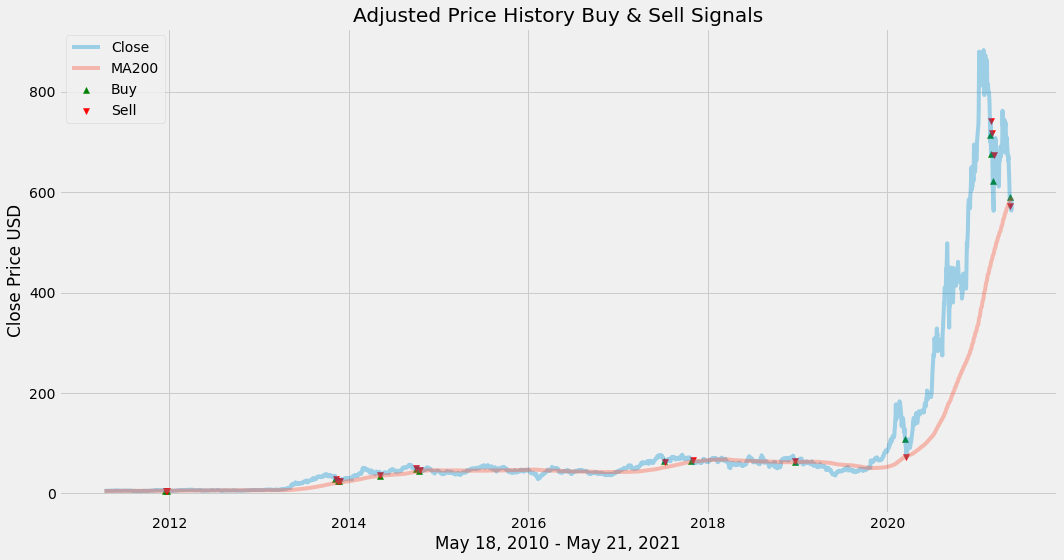

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df['Adj Close'], label='Close', alpha=0.35)
plt.plot(df['MA200'], label='MA200', alpha=0.35)
# plt.plot(df['RSI'], label='RSI', alpha=0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell', marker='v', color='red')
# plt.plot(df['RSI'], label='RSI', alpha=0.35)
plt.title('Adjusted Price History Buy & Sell Signals')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

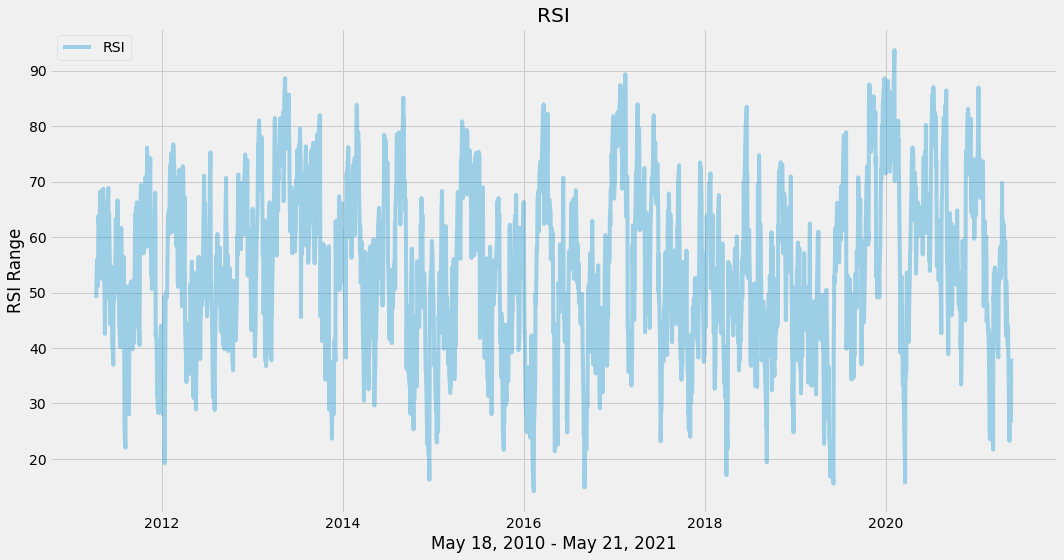

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(df['RSI'], label='RSI', alpha=0.35)
plt.title('RSI')
plt.xlabel(f'{start.strftime("%B %d, %Y")} - {datetime.datetime.now().strftime("%B %d, %Y")}')
plt.ylabel('RSI Range')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()